In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
import joblib

In [2]:
# Step 2: Load dataset with column names
df = pd.read_csv("heart.csv")

In [3]:
# Step 3: Clean data
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df = df.astype(float)

In [4]:
# Step 4: Convert to binary classification (0 = no disease, 1 = disease)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

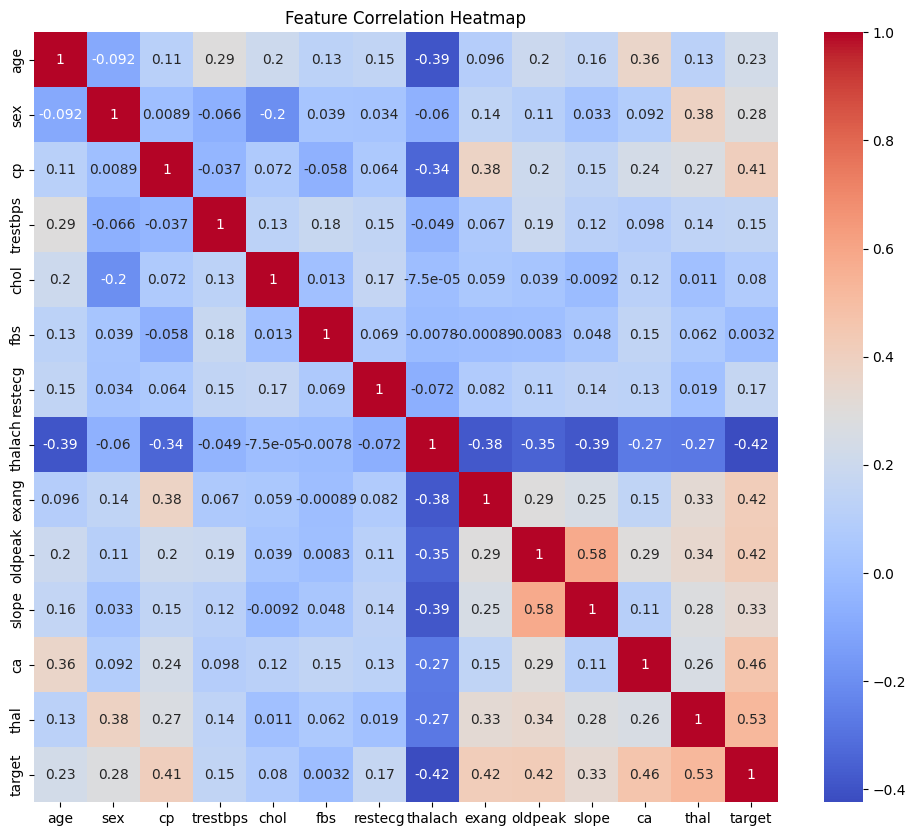

In [5]:
# Step 5: Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [6]:
# Step 6: Feature-target split
X = df.drop('target', axis=1)
y = df['target']

In [7]:
# Step 7: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [9]:
# Step 9: Model training (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [10]:
# Step 10: Model evaluation
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60

Confusion Matrix:
 [[32  4]
 [ 4 20]]
ROC AUC Score: 0.9421296296296298


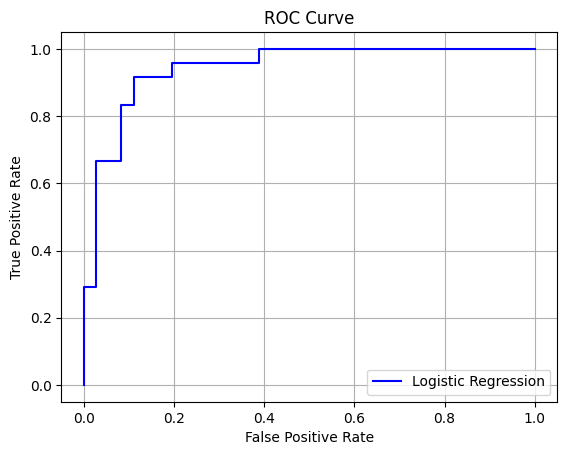

In [11]:
# Step 11: ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="Logistic Regression", color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Step 12: Save model and scaler
joblib.dump(model, 'heart_disease_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']